<h1 style="text-align: center">
<div style="color: #90EE90; font-size: 60%">Data Science DISCOVERY Project2</div>
<span style="">Project 2: You and Data Science</span>
<div style="font-size: 60%;"><a href="https://data.montgomerycountymd.gov/api/views/mmzv-x632/rows.csv?accessType=DOWNLOAD">https://data.montgomerycountymd.gov/api/views/mmzv-x632/rows.csv?accessType=DOWNLOAD</a></div>
</h1>

<hr style="color: #90EE90;">

## Section 1:
## Data Source:   Crash Reporting - Drivers Data

This data set provides details on the drivers of the motor vehicles that are involved in crashes on county and municipal roads. This data set contains information on every traffic collision that happens on local roads and on county in Montgomery County. This data was gathered by the Maryland State Police's Automated Crash Reporting System (ACRS) and reported by the Montgomery County, Gaithersburg, Rockville, and Maryland-National Capital Park police departments. This dataset displays all collision data as well as the participating drivers.

The Crash Reporting- DRivers Data has a [database](https://data.montgomerycountymd.gov/api/views/mmzv-x632/rows.csv?accessType=DOWNLOAD) 

They also have a public [website](https://catalog.data.gov/dataset/crash-reporting-drivers-data) that allows you to access the data programmatically.


## Section 1: Dataset

In this project i will be analyzing the "Crash Reporting - Drivers Data" dataset from Montgomery County, Maryland. Since road accidents is something that affects everyone, understnading the factors that contribute to accident can help in finding more reliable measures to reduce them. Also, it is imprtant mention that how anlyzing these data sets wold assist the society to avoid more crashes in the future.

This dataset specifically made me interested to me because Maryland is somewhat closer to my living area and since my dad went through several road accidents while he was driving, and I thought it would great to analyze data similar to my dads encounter; which I also think this would give insights into road accidents.It provides with valuable information on various aspects of road accidents, including details about drivers, vehicles, and the circumstances surrounding each accident.

I found this dataset throught the DATA.GOV website provided under the project description and I found dataset relate to a state that i consistantly visit, which is Maryland. I chose this dataset becuse  of its relavance to current road safety concerns and it is a data set that has most current data with weekly upadtes. Also, i found this data more trustworthy since it is gathered by the Montgomery County Police, Gaithersburg Police, Rockville Police, or the Maryland-National Capital Park Police, which is reliable to trust.

My main goal in this project is to undertsand the factors leading to accidents or identifying high risk areas.

# Loading the Dataset

Now, let's load the dataset into a DataFrame for our analysis. The dataset is in CSV format and can be imported using the pandas library to work with the data.

In [32]:
import pandas as pd
crash_data = 'Crash_Reporting_-_Drivers_Data.csv'
df = pd.read_csv(crash_data, low_memory=False) #added low_memory=false, since its give an error.
#df= pd.read_csv(crash_data)
df

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MCP3040003N,190026050,Montgomery County Police,Property Damage Crash,05/31/2019 03:00:00 PM,NaN,NaN,NaN,NaN,PARKING LOT OF 3215 SPARTAN RD,...,15,No,No,2004,HONDA,TK,UNKNOWN,39.150044,-77.063089,"(39.15004368, -77.06308884)"
1,EJ78850038,230034791,Gaithersburg Police Depar,Property Damage Crash,07/21/2023 05:59:00 PM,Maryland (State),FREDERICK RD,Unknown,WATKINS MILL RD,NaN,...,40,No,No,2011,GMC,TK,NO MISUSE,39.159264,-77.219025,"(39.1592635, -77.21902483)"
2,MCP2009002G,230034583,Montgomery County Police,Property Damage Crash,07/20/2023 03:10:00 PM,Maryland (State),GEORGIA AVE,Maryland (State),NORBECK RD,NaN,...,35,No,No,2019,FORD,F150,NO MISUSE,39.109535,-77.075806,"(39.10953506, -77.07580619)"
3,MCP3201004C,230035036,Montgomery County Police,Property Damage Crash,07/23/2023 12:10:00 PM,County,CRYSTAL ROCK DR,County,WATERS LANDING DR,NaN,...,40,No,No,2016,KIA,SW,NO MISUSE,39.190149,-77.266766,"(39.19014917, -77.26676583)"
4,MCP23290028,230035152,Montgomery County Police,Property Damage Crash,07/24/2023 06:10:00 AM,County,MONTGOMERY VILLAGE AVE,County,CENTERWAY RD,NaN,...,35,No,No,2016,TOYT,TK,NO MISUSE,39.172558,-77.203745,"(39.17255801, -77.20374546)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170212,DM8338000C,16010228,Takoma Park Police Depart,Property Damage Crash,03/01/2016 10:01:00 AM,Municipality,NEW HAMPSHIRE SERVICE LA,Municipality,PRINCE GEORGES AVE,NaN,...,25,No,No,2016,FORD,EXPLORER,NO MISUSE,38.972560,-76.997466,"(38.97255976, -76.99746609)"
170213,MCP1182001S,170519976,Montgomery County Police,Property Damage Crash,07/19/2017 02:22:00 PM,County,CEDAR LA,Maryland (State),OLD GEORGETOWN RD,NaN,...,35,No,No,2008,NISSAN,ALTIMA,NO MISUSE,39.004640,-77.108502,"(39.00464, -77.10850167)"
170214,MCP1453008X,200046217,Montgomery County Police,Property Damage Crash,11/23/2020 07:37:00 AM,Maryland (State),RIDGE RD,Unknown,LITTLE SENECA PKWY,NaN,...,40,No,No,2008,CHEVROLET,EXPRESS,NO MISUSE,39.228963,-77.236757,"(39.22896333, -77.23675667)"
170215,MCP2568000M,190056701,Montgomery County Police,Property Damage Crash,11/23/2019 11:23:00 PM,County,SHADY GROVE RD,Ramp,RAMP 9 FR IS 370 EB TO SHADY GROVE RD,NaN,...,35,No,No,2018,FORD,TRANSIT VAN,NO MISUSE,39.120440,-77.180047,"(39.12043995, -77.18004738)"


## Section 2: Exploratory Data Analysis

Crash Reporting - Drivers Data is a unique dataset ad Let explore our dataset more in depth with data anlysis!
In this section, we delve into the 'Crash Reporting - Drivers Data' to uncover patterns and insights regarding crash occurrences. We aim to perform a multifaceted analysis focusing on several key aspects:

### Time Analysis: part 1
We will explore the 'Crash Date/Time' data to determine the most common times for crashes. This includes an investigation into the time of day specifically the frequncy that crashes occur at 'AM' ( < 12 )

In [30]:
#create a new df with just using 'Crash Date/Time' column by using 'to_datetime'

df['Crash Date/Time'] = pd.to_datetime(df['Crash Date/Time'])
# Filter to create a DataFrame for AM times
crash_date_time_am_df = df.loc[df['Crash Date/Time'].dt.hour < 12, ['Crash Date/Time']]

crash_date_time_am_df

,Crash Date/Time
4,2023-07-24 06:10:00
5,2023-07-11 07:40:00
8,2023-07-21 07:14:00
15,2023-07-17 08:50:00
16,2023-07-25 10:12:00
...,...
170209,2019-08-03 10:16:00
170210,2022-10-29 06:01:00
170212,2016-03-01 10:01:00
170214,2020-11-23 07:37:00


### Time Analysis: part 2
We will explore the 'Crash Date/Time' data to determine the most common times for crashes. This includes an investigation into the time of day specifically the frequncy that crashes occur at 'PM' ( >= 12)

In [ ]:
#create a new df with just using 'Crash Date/Time' column by using 'to_datetime'
df['Crash Date/Time'] = pd.to_datetime(df['Crash Date/Time'])
crash_date_time_pm_df = df.loc[df['Crash Date/Time'].dt.hour >= 12, ['Crash Date/Time']]
crash_date_time_pm_df

,Crash Date/Time
0,2019-05-31 15:00:00
1,2023-07-21 17:59:00
2,2023-07-20 15:10:00
3,2023-07-23 12:10:00
6,2023-07-12 20:28:00
...,...
170207,2022-08-02 17:30:00
170208,2017-05-08 17:12:00
170211,2018-03-25 14:10:00
170213,2017-07-19 14:22:00


### Speed Limit Analysis: part 1
Given that speed is a significant factor in crash occurrences and outcomes, we will examine the relationship between reported crashes and speed limits, particularly looking at instances where the speed limit exceeds 35 mph.

In [ ]:
# Assuming 'Speed Limit' is the name of the column in your DataFrame that contains speed limit data and then filter the DataFrame to only include rows where the speed limit exceeds 35 mph
high_speed_crashes_df = df[df['Speed Limit'] > 35]
high_speed_crashes_df = df.loc[df['Speed Limit'] > 35, ['Crash Date/Time', 'Speed Limit']]
high_speed_crashes_df

,Crash Date/Time,Speed Limit
1,2023-07-21 17:59:00,40
3,2023-07-23 12:10:00,40
12,2023-06-24 12:39:00,50
20,2023-07-21 17:05:00,40
23,2023-07-24 16:45:00,40
...,...,...
170198,2017-09-15 21:12:00,40
170202,2018-04-10 15:38:00,55
170207,2022-08-02 17:30:00,40
170208,2017-05-08 17:12:00,50


### Speed Limit Analysis: part 2
Given that speed is a significant factor in crash occurrences and outcomes, we will examine the relationship between reported crashes and speed limits, particularly looking at instances where the speed limit lower than or equal to 35 mph.

In [ ]:
# Assuming 'Speed Limit' is the name of the column in your DataFrame that contains speed limit data and then filter the DataFrame to only include rows where the speed limit lower than or equal to 35 mph
low_speed_crashes_df = df[df['Speed Limit'] <= 35]
low_speed_crashes_df = df.loc[df['Speed Limit'] <= 35, ['Crash Date/Time', 'Speed Limit']]
low_speed_crashes_df

,Crash Date/Time,Speed Limit
0,2019-05-31 15:00:00,15
2,2023-07-20 15:10:00,35
4,2023-07-24 06:10:00,35
5,2023-07-11 07:40:00,30
6,2023-07-12 20:28:00,25
...,...,...
170211,2018-03-25 14:10:00,25
170212,2016-03-01 10:01:00,25
170213,2017-07-19 14:22:00,35
170215,2019-11-23 23:23:00,35


### Vehicle Make Analysis
We will analyze the frequency of crashes by 'Vehicle Make' to identify if certain car brands are more commonly involved in accidents.


In [ ]:
# Count the frequency of each unique value in the 'Vehicle Make' column
vehicle_make_counts = df['Vehicle Make'].value_counts()
vehicle_make_counts_df = vehicle_make_counts.reset_index()
vehicle_make_counts_df.columns = ['Vehicle Make', 'Number of Crashes']
vehicle_make_counts_df


,Vehicle Make,Number of Crashes
0,TOYOTA,22918
1,HONDA,18674
2,FORD,16967
3,TOYT,8716
4,NISSAN,8432
...,...,...
1859,STRA,1
1860,LEAF,1
1861,4S,1
1862,HONDAP,1


### Vehicle Year Analysis: part 1
The analysis will also extend to the 'Vehicle Year', where we will focus on identifying the frequency of crashes involving vehicles manufactured before the year 2013.

In [ ]:
# this is something i leanred new where we using errors='coerce'
df['Vehicle Year'] = pd.to_numeric(df['Vehicle Year'], errors='coerce')
# include vehicles with a year less than 2013
older_vehicles_df = df[df['Vehicle Year']<2013]
# Count the frequency of crashes for each vehicle year
older_vehicle_crashes = older_vehicles_df['Vehicle Year'].value_counts()

# Convert into a DataFrame 
older_vehicle_crashes_df = older_vehicle_crashes.reset_index()
older_vehicle_crashes_df.columns = ['Vehicle Year', 'Number of Crashes']
older_vehicle_crashes_df

,Vehicle Year,Number of Crashes
0,2012,9245
1,2011,8311
2,2007,7871
3,2008,7841
4,2006,7371
...,...,...
81,1911,1
82,1949,1
83,1960,1
84,1967,1


### Vehicle Year Analysis: part 2
The analysis will also extend to the 'Vehicle Year', where we will focus on identifying the frequency of crashes involving vehicles manufactured after the year 2013 to preesent.

In [ ]:
df['Vehicle Year'] = pd.to_numeric(df['Vehicle Year'], errors='coerce')
newer_vehicles_df = df[(df['Vehicle Year'] >= 2013) & (df['Vehicle Year'] <= 2023)]
newer_vehicle_crashes = newer_vehicles_df['Vehicle Year'].value_counts()

# Convert into a DataFrame 
newer_vehicle_crashes_df = newer_vehicle_crashes.reset_index()
newer_vehicle_crashes_df.columns = ['Vehicle Year', 'Number of Crashes']
newer_vehicle_crashes_df

,Vehicle Year,Number of Crashes
0,2015,11729
1,2014,11536
2,2016,11070
3,2013,10845
4,2017,8950
5,2018,6627
6,2019,5355
7,2020,3379
8,2021,2494
9,2022,1567


Now, lets add all the number of crashes occured 'Yehcle Year'<2013.

In [ ]:
total_older_vehicle_crashes = older_vehicles_df.shape[0]
total_older_vehicle_crashes

95877

Now, lets add all the number of crashes occured 'Yehcle Year' >= 2013.

In [ ]:
total_newer_vehicle_crashes = newer_vehicles_df.shape[0]
total_newer_vehicle_crashes

74190

## Section 3: Exploratory Data Visualization

### Data visualization that depicts a comparison of road traffic accidents that occurred in the AM and PM.

<Axes: xlabel='AM/PM'>

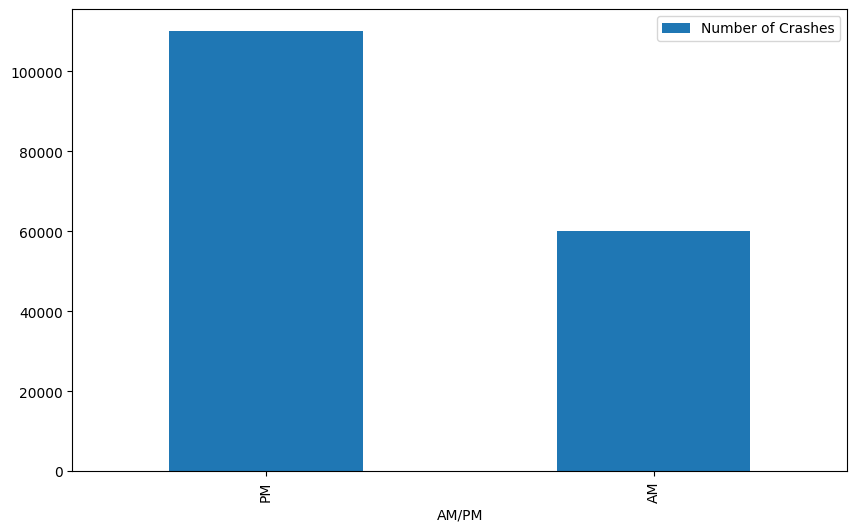

In [ ]:
#Use of.dt.hour.apply is new i learned through internet which is not included in our course material and i found this method interesting to use.
df['AM/PM'] = df['Crash Date/Time'].dt.hour.apply(lambda x: 'AM' if x < 12 else 'PM')
# Count the occurrences of AM and PM
am_pm_counts = df['AM/PM'].value_counts()

# Convert this to a DataFrame for plotting
am_pm_counts_df = am_pm_counts.reset_index()
am_pm_counts_df.columns = ['AM/PM', 'Number of Crashes']

# Plotting the bar graph
am_pm_counts_df.plot.bar(x='AM/PM', y='Number of Crashes', figsize=(10, 6))



### Result summary
The comparison of traffic accidents that happened in the AM and PM is shown in the bar graph. It is evident that there are more accidents during the PM, which raises the possibility that there are more risk factors for driving during this time of day, such as heavier traffic, less visibility, or a higher frequency of unsafe driving practises. Targeting safety measures and interventions to lower accident rates during these hours may require the use of this information.

### Data Visualization that illustrates the number of crashes by the year of the vehicle, spanning from 2013 to 2023

<Axes: xlabel='Vehicle Year'>

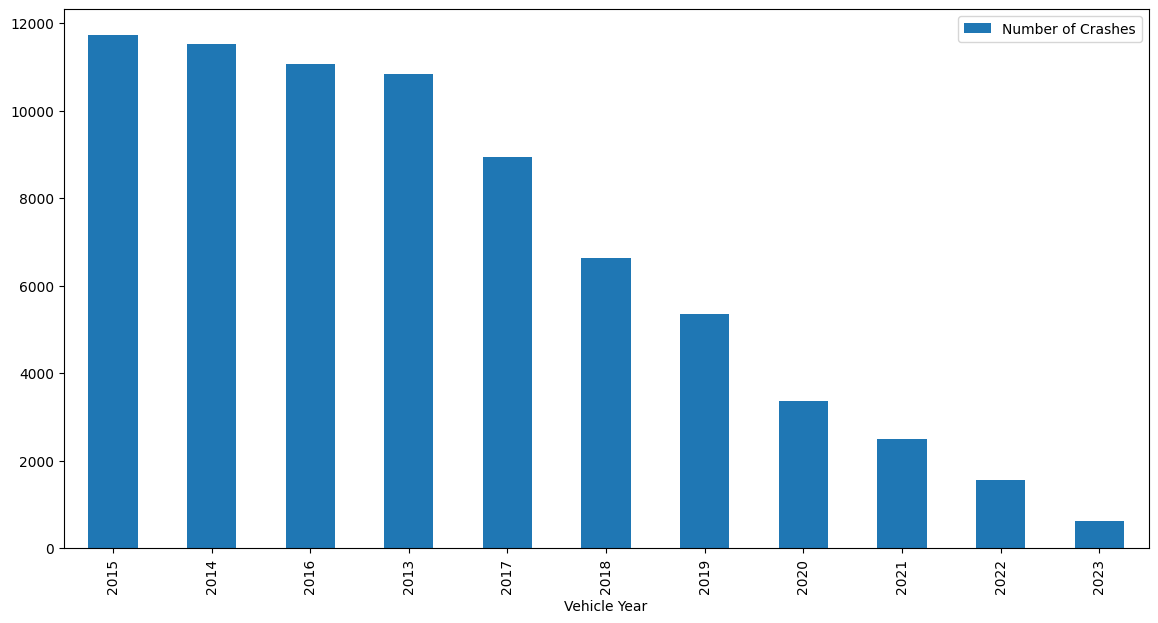

In [ ]:
newer_vehicle_crashes_df.plot.bar(x='Vehicle Year', y='Number of Crashes', figsize=(14, 7))


### Result Summary:
From 2013 until 2023, the number of crashes by car year is depicted in a bar graph. With 2015 having the highest number of vehicle-related crashes and a general fall shown in the following years, it is clear that the frequency of crashes tends to decline for newer vehicle types. This pattern might be the result of improvements in automotive safety systems or shifts in the number of particular model years on the road. But we can not completly agree with the assumption in this case.

## Section 4: Data Science

### Question:
An intriguing question we might ask is weather "there a significant correlation between the speed limits and the number of accidents?" 

In this project, we delve into an insightful exploration of the "Crash Reporting - Drivers Data" dataset from Montgomery County, Maryland. One particularly intriguing question that emerged during the initial analysis was about the relationship between speed limits and the frequency of road accidents. 

### How iam planing to use python to answer them.
1. **Data Preparation:** We started by grouping the data by 'Speed Limit' and counted the number of accidents for each speed limit category.
2. **Numeric Conversion and Cleanup:** To get more accurate data, we converted the 'Speed Limit' and 'Crash Counts' to numeric types and removed any NaN values to maintain the integrity of our analysis.
3. **Correlation Analysis:** Using `scipy.stats`, we calculated the Pearson correlation coefficient between 'Speed Limit' and 'Crash Counts'. This coefficient gives us a value between -1 and 1. 


#### Hypothesis
**Null Hypothesis (H0):** here is no correlation between the speed limit and the frequency of accidents.
**Alternative Hypothesis (H1):** There is a significant correlation between the speed limit and the frequency of accidents.

### Libries needed:
If you **do not** have the `seaborn` library installed, try running any one of following commands in your **terminal** until successful installation:
- `pip install seaborn`
- `pip3 install seaborn`
- `py -m pip install seaborn`
- `python3 -m pip install seaborn`

To install the `statsmodels` library, try running any one of following commands in your **terminal** until successful installation:
- `python3 -m pip install statsmodels`
- `py -m pip install statsmodels`
- `pip install statsmodels`
- `pip3 install statsmodels`

In [ ]:
#importing the libries
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

crash_counts_by_speed = df.groupby('Speed Limit').size().reset_index(name='Crash Counts')

#'Speed Limit' and 'Crash Counts' are numeric
crash_counts_by_speed['Speed Limit'] = pd.to_numeric(crash_counts_by_speed['Speed Limit'], errors='coerce')
crash_counts_by_speed['Crash Counts'] = pd.to_numeric(crash_counts_by_speed['Crash Counts'], errors='coerce')

# Drop NaN values from these columns
crash_counts_by_speed.dropna(subset=['Speed Limit', 'Crash Counts'], inplace=True)

# Calculate the Pearson correlation coefficient and this is somthing new that i added which  leanred 'pearsonr'
correlation_coefficient, p_value = stats.pearsonr(crash_counts_by_speed['Speed Limit'], crash_counts_by_speed['Crash Counts'])

In [ ]:
# Output the correlation coefficient and p-value
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Correlation Coefficient: -0.16253605567217033
P-value: 0.5475552763700016


### Interpret the hypothesis test results

In [ ]:
alpha = 0.05  # Significance level
if p_value < alpha:
    print("We reject the null hypothesis and conclude that there is a significant correlation between speed limit and the frequency of accidents.")
else:
    print("We fail to reject the null hypothesis and conclude that there is no significant correlation between speed limit and the frequency of accidents.")

We fail to reject the null hypothesis and conclude that there is no significant correlation between speed limit and the frequency of accidents.


#### Results: 
We fail to reject the null hypothesis and conclude that there is no significant correlation between speed limit and the frequency of accidents.

## Section 5: Overall Summary

### Summary:

To examine the several factors that could affect traffic accidents, I examined the "Crash Reporting - Drivers Data" dataset from Montgomery County, Maryland, for this data science project. This dataset examined and offered a thorough examination of a number of factors related to traffic incidents, including as the time and date of collisions, posted speed limits, the kinds of cars involved, and the model and year of the vehicles. Examining the connection between the frequency of accidents and speed limits was one of the major analyses carried out. And as my question I anlyzed my data by asking whther **a higher speed limit is associated with more accidents** was explored as a hypothesis. In this hypothesis test's based on the results of the p- value, it revealed that the connection was not statistically significant. This concluded that there is no strong evidence to suggest a significant relationship between speed limit and the number of crashes.

In addtion to that, during this project I also added exploratory data analysis and visualizaion. In my analysis, it depicted that there is a tendancy showing that the newer car models are involved in fewer accidnets compared to older models. Also, another thing that i concluded was that there is higher chance of of happening an accident during the PM compared to AM, which I belive this results to be true in real life. The data visualisation successfully brought these trends to light and provided visual proof for the analytical conclusions. In addition my Python data manipulation and statistical analysis skills, this project gave me insightful knowledge about the variables influencing road safety, knowledge that will be used in future policy decisions and public awareness initiatives..